In [2]:
from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy

In [3]:
X1, Y1 = make_blobs(n_features=2, centers=3, random_state=43, cluster_std=0.5)
Y1=Y1.reshape(-1,1)
X=np.hstack((X1,Y1))

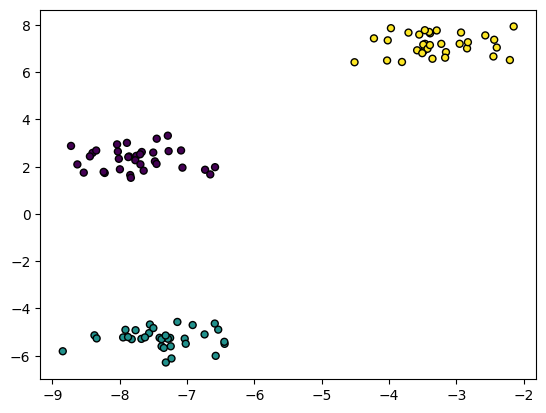

In [4]:
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=25, edgecolor="k")
plt.show()

In [5]:
X1.shape

(100, 2)

In [6]:
Y1.shape

(100, 1)

In [7]:
n=np.array([[1,3],[2,3],[3,2]])
n

array([[1, 3],
       [2, 3],
       [3, 2]])

In [8]:
c=np.array([[1],[2],[2]])
c

array([[1],
       [2],
       [2]])

In [9]:
n[:,1]==3

array([ True,  True, False])

In [10]:
r=np.concatenate((n,c),axis=1)
r

array([[1, 3, 1],
       [2, 3, 2],
       [3, 2, 2]])

In [11]:
r[:,2]==2

array([False,  True,  True])

In [12]:
o=r[r[:,2]==2]

In [13]:
o[:,0].std()

0.5

In [14]:
x_ones = X1[Y1[:,0]==1][:, 1]

In [15]:
mu=0
r_prom=0
epochs = 100
errors = []
for e in range(epochs):
    epoch_errors = []
    for i, sample in enumerate(x_ones):
        lr = 1/(1+i)
        mu += lr * (sample - mu)
        epoch_errors.append(abs(mu - x_ones.mean(axis=0)))
    errors.append(np.mean(epoch_errors))

print(mu, x_ones.mean())

-5.2700933448410625 -5.270093344841062


In [16]:
# Inicialización de sigma
sigma = 0

# Cálculo de la varianza
for sample in x_ones:
    sigma += (sample - mu) ** 2

# Promedio de la varianza
sigma /= len(x_ones)

# Desviación estándar
sigma = np.sqrt(sigma)

print(sigma, x_ones.std())

0.40306695166784773 0.40306695166784773


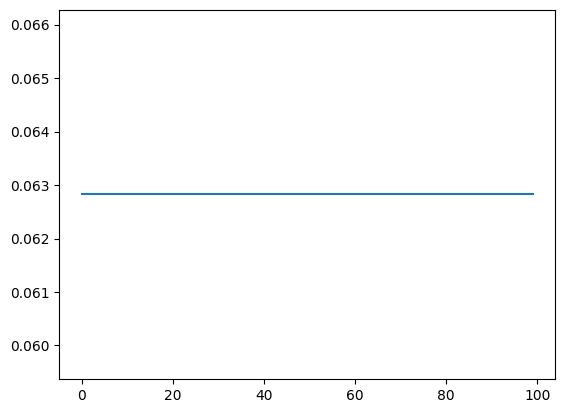

In [17]:
# Grafica de errores por epoch
plt.plot(errors)

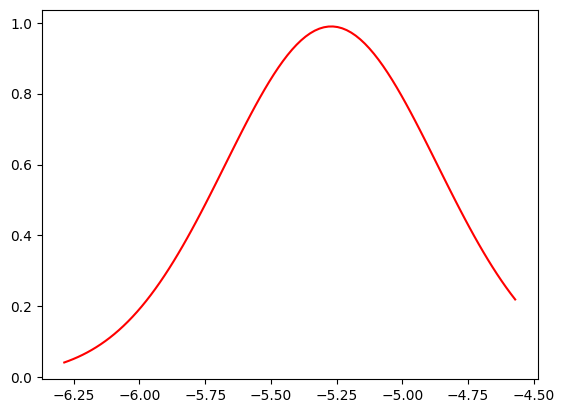

In [18]:
# PDF parametrizada con mu y sigma
x = np.linspace(x_ones.min(), x_ones.max(), 100)
y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

plt.plot(x, y, color='red')